# My First RNN

Code which trains a recurrent NN to make predictions on points in advance of a time series dataset. It's my first RNN, so go easy on me! 

Written in Tensorflow

In [2]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 

import os

As is customary, let's define a class to take in our NNs as input 

In [3]:
class rn_network(tf.Module):
    def __init__(self, nn_type, units, num_features, num_inputs):
        super(rn_network, self).__init__()
        # Assign the architecture to the RNN instance
        if (nn_type==0):
            self.mynn = tf.keras.models.Sequential([
            # Shape [batch, time, features] => [batch, time, lstm_units]
            tf.keras.layers.LSTM(units, input_shape=(None, num_inputs), return_sequences=False),
            # Shape => [batch, time, features]
            tf.keras.layers.Dense(units=num_features)])
            
# Do units represent the number of time steps that we want to compute? We might need to find out here. 

Let's look at the folder ... how many files?

In [10]:
direc_name = "Batched Data" # yaml worthy
time_steps = 12 # yaml worthy 
sizeOfFiles = len([name for name in os.listdir(f'{direc_name}/.')]) # Global parameter
print(f"Number of files:{sizeOfFiles}")

Number of files:2206


In [11]:
os.listdir(f'{direc_name}/.')

['000000.csv',
 '000001.csv',
 '000002.csv',
 '000003.csv',
 '000004.csv',
 '000005.csv',
 '000006.csv',
 '000007.csv',
 '000008.csv',
 '000009.csv',
 '000010.csv',
 '000011.csv',
 '000012.csv',
 '000013.csv',
 '000014.csv',
 '000015.csv',
 '000016.csv',
 '000017.csv',
 '000018.csv',
 '000019.csv',
 '000020.csv',
 '000021.csv',
 '000022.csv',
 '000023.csv',
 '000024.csv',
 '000025.csv',
 '000026.csv',
 '000027.csv',
 '000028.csv',
 '000029.csv',
 '000030.csv',
 '000031.csv',
 '000032.csv',
 '000033.csv',
 '000034.csv',
 '000035.csv',
 '000036.csv',
 '000037.csv',
 '000038.csv',
 '000039.csv',
 '000040.csv',
 '000041.csv',
 '000042.csv',
 '000043.csv',
 '000044.csv',
 '000045.csv',
 '000046.csv',
 '000047.csv',
 '000048.csv',
 '000049.csv',
 '000050.csv',
 '000051.csv',
 '000052.csv',
 '000053.csv',
 '000054.csv',
 '000055.csv',
 '000056.csv',
 '000057.csv',
 '000058.csv',
 '000059.csv',
 '000060.csv',
 '000061.csv',
 '000062.csv',
 '000063.csv',
 '000064.csv',
 '000065.csv',
 '000066.c

NEW: Our data is being batched externally ... let's load up the csv files and compose a dataset out of that. 

In [13]:
import pandas as pd

# Routine to normalize between 0 and 1 (Following the atmospheric turbulence paper)

def norm_data(x):
    for ii in range(len(x)):
        x[ii] = (x[ii] - np.min(x))/(np.max(x) - np.min(x))
    return x

def loadData(direc_name, time_steps):
    
    total_input = []
    total_output = []
    
    
    # Files expected
    
    directory_list = [name for name in os.listdir(f'{direc_name}/.')]
    
    
    for ii, name in enumerate(directory_list):
        
        print(f'{direc_name}/{name}')
        print(ii)
        
        input()
        
        df = pd.read_csv(f'{direc_name}/{name}')
        
        dataset_weather = np.empty((time_steps, 4))
        dataset_output = np.empty((time_steps, 2))
        
        ###### INPUT DATA #######
        
        # In the 0th input, temperature
        dataset_weather[:,0] = eval(df["temperature"])
        # In the 1st input, relative humidity (%)
        dataset_weather[:,1] = eval(df["relative_humidity"])
        # In the 2nd input, standard pressure 
        dataset_weather[:,2] = eval(df["pressure_station"])
        #In the 3rd input, Solar Radiation 
        dataset_weather[:,3] = eval(df["solar_radiation"])
        
        total_input.append(dataset_weather)
        
        ###### OUTPUT DATA #######
        
        # In the 0th output, CN2
        dataset_output[:,0] = eval(df["CN2"][ii])
        # In the 1st output, R0
        dataset_output[:,1] = eval(df["R0"][ii])
        
        total_output.append(dataset_output)
        
    total_input = np.array(total_input)
    total_output = np.array(total_output)
    
    return total_input, total_output

# Let's give it a test 

X, y = loadData(direc_name, 12)

    

Batched Data/000000.csv
a


NameError: name 'ii' is not defined

Load up the input and output data & prepare it for training

<Axes: >

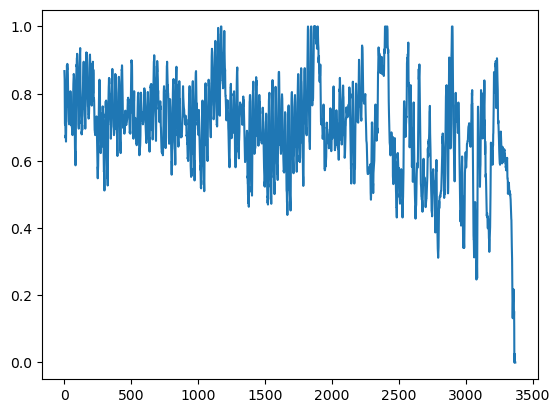

In [97]:
import pandas as pd

# Load csv files 

df_weather=pd.read_csv('Weather Data/input_weatherData.csv')
df_scintillometer=pd.read_csv('Weather Data/output_scintillometerData_wLI.csv')

def loadData(trainPercent): # Mostly plagarized from my QPT training code
    
    temp_input = pd.read_csv('Training Datasets/input_data.csv')
    temp_output = pd.read_csv('Training Datasets/output_data.csv')
    testPercent = 1 - trainPercent
    
    input_data = temp_input.to_numpy()[0:,1:]
    output_data = temp_output.to_numpy()[0:, 1:]
    
    total = len(input_data)
    trainLength = int(trainPercent*total)
    testLength =  int(testPercent*total)
    
    # Create shapes for the training/testing dataset
    
    OGShape_X = np.shape(input_data)
    OGShape_y = np.shape(output_data)
    
    XShape_train = (trainLength, OGShape_X[1])
    yShape_train =  (trainLength, OGShape_y[1])
    
    XShape_test = (testLength, OGShape_X[1])
    yShape_test = (testLength, OGShape_y[1])

    # Instantiate empty lists for the training/test dataset
    
    X_train = np.empty(XShape_train)
    y_train = np.empty(yShape_train)
    
    X_test = np.empty(XShape_test)
    y_test = np.empty(yShape_test)
    
    # Now, activate the indices
    
    X_train = input_data[:trainLength]
    y_train = output_data[:trainLength]
    
    X_test = input_data[trainLength:]
    y_test = output_data[trainLength:]
    

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = loadData(0.85)

# For plotting/visualization ... let's create a time series?

time_series = np.arange(0, len(X_train) )
sns.lineplot(x=time_series, y=X_train[:,0])

Let's make a plot of the data that we're working with 

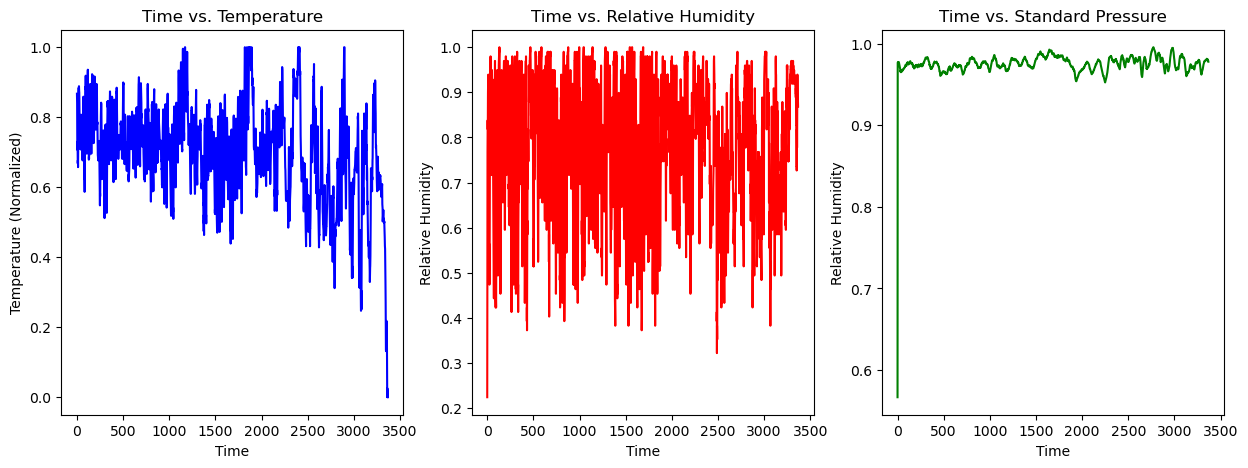

In [98]:
# For plotting/visualization ... let's create a time series? The order of data is Temperature -- Relative Humidity -- Stdn Pressure

time_series = np.arange(0, len(X_train))

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0] = sns.lineplot(x=time_series, y=X_train[:,0], ax=ax[0], color='blue')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Temperature (Normalized)')
ax[0].set_title('Time vs. Temperature')

ax[1] = sns.lineplot(x=time_series, y=X_train[:,1], ax=ax[1], color='red')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Relative Humidity')
ax[1].set_title('Time vs. Relative Humidity')

ax[2] = sns.lineplot(x=time_series, y=X_train[:,2], ax=ax[2], color='green')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Relative Humidity')
ax[2].set_title('Time vs. Standard Pressure')


plt.show()

In [113]:
x = np.array([1, 2, 3,4,5,6])
# Reshape the input to the required sample_size x time_steps (per batch) x features 
x_input = np.reshape(x,(1, 3, 2))



X_train_input = np.reshape(X_train, (1,len(X_train),3))
X_test_input = np.reshape(X_test, (1,len(X_test),3))

y_train_output = np.reshape(y_train, (1,len(y_train), 2))
y_test_output = np.reshape(y_test, (1,len(y_test), 2))




Yikes ... kinda noisy 

Anyway, let us begin

In [118]:
model = rn_network(0,3,2,3) # LSTM with 20 units and output features of 2

# Compile the model 
model.mynn.compile(loss='mse', optimizer='adam')

# Train the model 

hist = model.mynn.fit(X_train_input,y_train_output, batch_size=1, validation_data=(X_test_input, y_test_output), epochs=30)




Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.0671 - val_loss: 0.0542
Epoch 2/30
1/1 [==============================] - 0s 325ms/step - loss: 0.0649 - val_loss: 0.0522
Epoch 3/30
1/1 [==============================] - 0s 320ms/step - loss: 0.0628 - val_loss: 0.0503
Epoch 4/30
1/1 [==============================] - 0s 318ms/step - loss: 0.0608 - val_loss: 0.0483
Epoch 5/30
1/1 [==============================] - 0s 318ms/step - loss: 0.0588 - val_loss: 0.0465
Epoch 6/30
1/1 [==============================] - 0s 319ms/step - loss: 0.0568 - val_loss: 0.0447
Epoch 7/30
1/1 [==============================] - 0s 319ms/step - loss: 0.0549 - val_loss: 0.0430
Epoch 8/30
1/1 [==============================] - 0s 316ms/step - loss: 0.0530 - val_loss: 0.0412
Epoch 9/30
1/1 [==============================] - 0s 329ms/step - loss: 0.0512 - val_loss: 0.0396
Epoch 10/30
1/1 [==============================] - 0s 317ms/step - loss: 0.0494 - val_loss: 0.0380
Epoch 11/30
1/1 [=====